# Capstone Project : Model Comparison

In this notebook, We will compare all the different algorithms we've used, and the metric we will stick to PR AUC and ROC AUC.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from pylab import rcParams
import math

from imblearn.pipeline import Pipeline as pl
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, precision_recall_curve, cohen_kappa_score
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


# Preprocessing the Data
We have acquired and cleaned the data in this IPython Notebook. All the features were used for this analysis. Let's get the data prepared for modeling.

In [2]:
# global set
pd.set_option('display.max_columns', None)

# Load the data
telco = pd.read_csv("telco_eda.csv") 

# recode the features
# tranform to dummy variable
binvar = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
          'PaperlessBilling', 'Churn']
for col in binvar:
    telco[col] = telco[col].apply(lambda x: 1 if x=='Yes' else 0 )
    
transformed_telco = pd.get_dummies(telco)
transformed_telco.shape

# Train/test split
X = transformed_telco.drop(["Churn"], axis=1).values
y = transformed_telco.Churn.astype(int).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, stratify = y)

## Logistic Regression

In [3]:
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", LogisticRegression(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__C = [0.1],
                  model__penalty = ['l2'],
                  model__class_weight = ['balanced']
                  )
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
LR = GridSearchCV(pipe, 
                    param_grid = param_grid, 
                    verbose = 3,
                    cv = cv,
                    n_jobs=-1,
                    scoring='average_precision',
                    iid=False)

# Training using CV
LR.fit(X_train, y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   19.0s remaining:   28.6s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.3s finished
/Users/jinghongjiangyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                   

# Random Forest

In [6]:
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", RandomForestClassifier(random_state=40))]
pipe = pl(steps)

# Parameters
param_grid = dict(model__n_estimators = [50],
                  model__max_features = ['sqrt'],
                  model__min_samples_leaf = [ 30],
                  model__class_weight = ['balanced'])
# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
RF = GridSearchCV(pipe, 
                    param_grid = param_grid, 
                    verbose = 3,
                    cv = cv,
                    n_jobs=-1,
                    scoring='average_precision',
                    iid=False)

# Training using CV
RF.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   17.3s remaining:   25.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   17.8s finished
/Users/jinghongjiangyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_node...
         

# Naive Bayes

In [7]:
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model",  GaussianNB())]
pipe = pl(steps)

# Parameters
param_grid = dict(model__var_smoothing =  [0.01])

# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
GNB = GridSearchCV(pipe, 
                    param_grid = param_grid, 
                    verbose = 3,
                    cv = cv,
                    n_jobs=-1,
                    scoring='average_precision',
                    iid=False)

# Training using CV
GNB.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
/Users/jinghongjiangyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        GaussianNB(priors=None,
                                                   var_smoothing=1e-09))],
                                verbose=False),
             iid=False, n_jobs=-1, param_grid={'model__var_smoothing': [0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='average_precision', verbose=3)

# XGBoost

In [8]:
# Steps for pipeline
steps = [("scaler", MinMaxScaler(feature_range=(0,1))),
         ("model", XGBClassifier())]
pipe = pl(steps)

# Parameters
param_grid = dict(model__learning_rate = [0.10],
                  model__max_depth = [5],
                  model__gamma = [ 0.2],
                  model__colsample_bytree = [0.7],
                  model__class_weight = ['balanced'])

# For CV in grid search
cv = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 20)

# Setting up the grid search
XGB =GridSearchCV(pipe, 
                    param_grid = param_grid, 
                    verbose = 3,
                    cv = cv,
                    n_jobs=-1,
                    scoring='average_precision',
                    iid=False)

# Training using CV
XGB.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.6s remaining:    5.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.3s finished
/Users/jinghongjiangyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=20, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        MinMaxScaler(copy=True,
                                                     feature_range=(0, 1))),
                                       ('model',
                                        XGBClassifier(base_score=0.5,
                                                      booster='gbtree',
                                                      colsample_bylevel=1,
                                                      colsample_bynode=1,
                                                      colsample_bytree=1,
                                                      gamma=0,
                                                      learning_rate=0.1,
                                                      max_d...
        

In [10]:
# Create prediction for all model
y_pred_test_prob1 = LR.predict_proba(X_test)
y_pred_test_prob2 = RF.predict_proba(X_test)
y_pred_test_prob3 = GNB.predict_proba(X_test)
y_pred_test_prob4 = XGB.predict_proba(X_test)

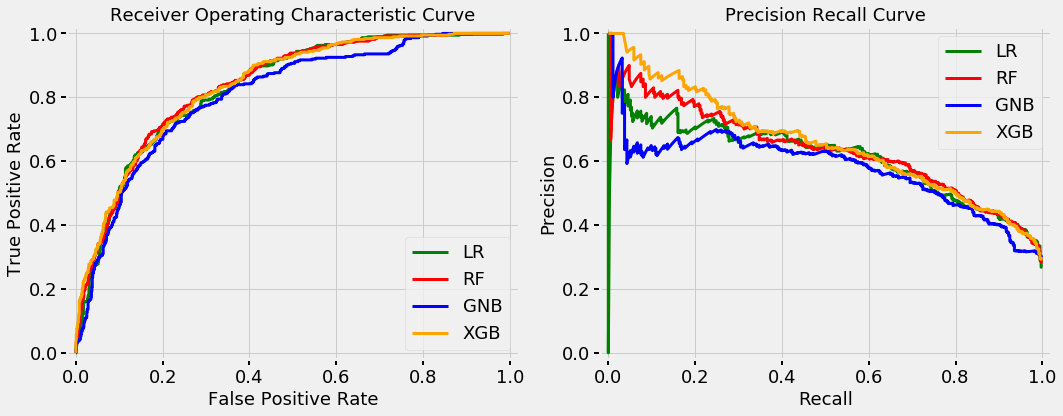

In [15]:
plt.style.use('fivethirtyeight')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,6))
# ROC
ax1 = plt.subplot(1, 2, 1)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_prob1[:, 1])
ax1.plot(fpr, tpr, label='LR', color="green", linewidth=3)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_pred_test_prob2[:, 1])
ax1.plot(fpr1, tpr1,label='RF', color="red", linewidth=3)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred_test_prob3[:, 1])
ax1.plot(fpr2, tpr2, label='GNB', color="blue", linewidth=3)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_pred_test_prob4[:, 1])
ax1.plot(fpr3, tpr3,label='XGB', color="orange", linewidth=3)

ax1.set_xlim([-0.02, 1.02])
ax1.set_ylim([-0.02, 1.02])
ax1.set_xlabel('False Positive Rate', size=18)
ax1.set_ylabel('True Positive Rate', size=18)
ax1.set_title('Receiver Operating Characteristic Curve', size=18)
ax1.tick_params(direction='out', length=6, width=2, colors='k', labelsize=18)
ax1.legend(loc="lower right", fontsize=18)
    
#PR
ax2 = plt.subplot(1, 2, 2)
prec, recall, thresholds = precision_recall_curve(y_test, y_pred_test_prob1[:, 1])
ax2.plot(recall, prec, label='LR', color="green", linewidth=3)    
prec1, recall1, thresholds1 = precision_recall_curve(y_test, y_pred_test_prob2[:, 1])
ax2.plot(recall1, prec1, label='RF', color="red", linewidth=3)
prec2, recall2, thresholds2 = precision_recall_curve(y_test, y_pred_test_prob3[:, 1])
ax2.plot(recall2, prec2, label='GNB', color="blue", linewidth=3)
prec3, recall3, thresholds3 = precision_recall_curve(y_test, y_pred_test_prob4[:, 1])
ax2.plot(recall3, prec3, label='XGB', color="orange", linewidth=3)
 
ax2.set_xlim([-0.02, 1.02])
ax2.set_ylim([-0.02, 1.02])
ax2.set_xlabel('Recall', size=18)
ax2.set_ylabel('Precision', size=18)
ax2.set_title('Precision Recall Curve', size=18)
ax2.tick_params(direction='out', length=6, width=2, colors='k', labelsize=18)
ax2.legend(loc="best", fontsize=18)
    
plt.tight_layout()